Importing the necessary libraries

In [87]:
import pandas as pd  #to read data
import matplotlib.pyplot as plt  #visualise data
import quandl #to get data stored on Quandl
import numpy as np # to sort data
from tabulate import tabulate # create tables
import warnings #supress warnings

QUESTION 1

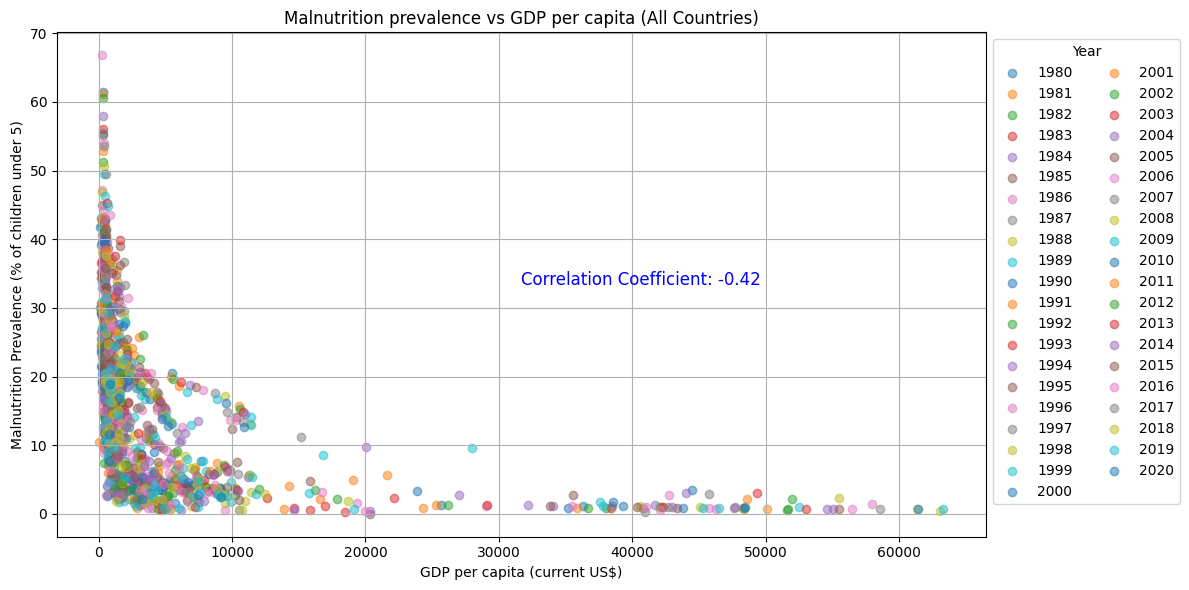

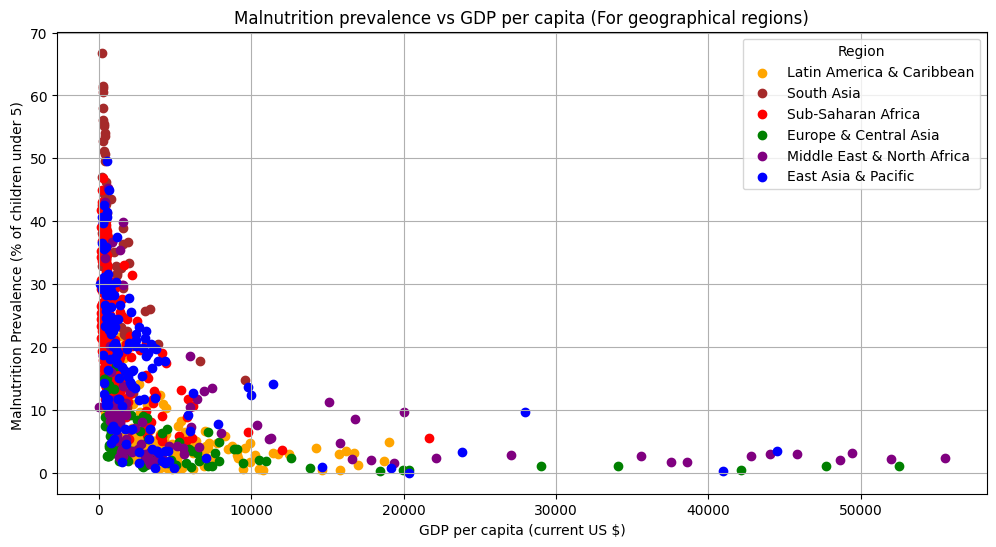

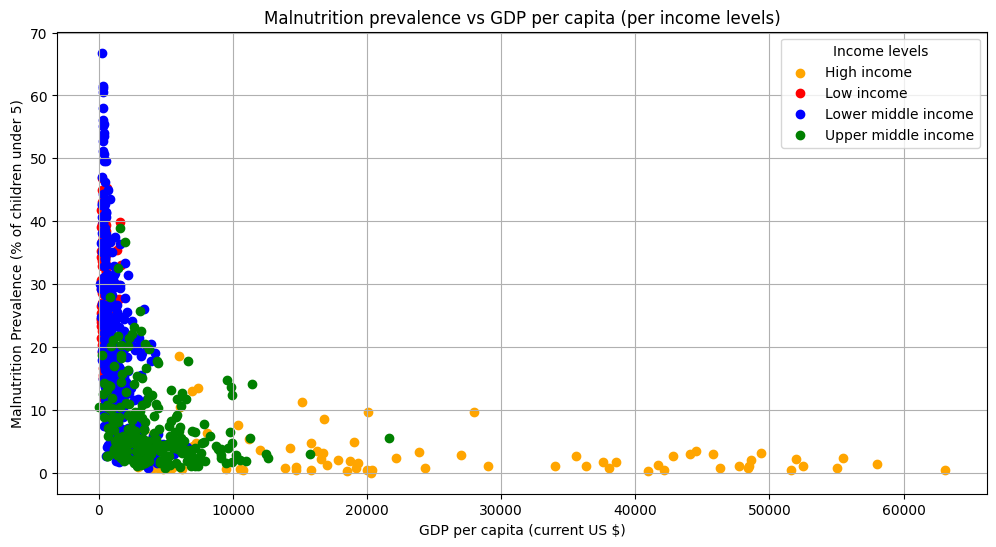

In [88]:
# Defining a list of file names
file_names = ['data/GDP.csv', 'data/Malnutrition.xls', 'data/Metadata.csv']

# Defining a  list of functions for reading each file
file_readers = [
    lambda x: pd.read_csv(x, skiprows=4, usecols=lambda x: 'Unnamed' not in x),  # GDP.csv
    lambda x: pd.read_excel(x, sheet_name='Data', skiprows=3),  # Malnutrition.xls
    lambda x: pd.read_csv(x, usecols=lambda x: 'Unnamed' not in x),  #  Metadata.csv
]

# Reading  the files using the predefined functions
GDP, Malnutrition, Metadata = [reader(file_name) for reader, file_name in zip(file_readers, file_names)]

# Setting the country name as an index
gdp_indexed = GDP.set_index('Country Name')
malnutrition_indexed = Malnutrition.set_index('Country Name')

# Creating a  subplots for the scatter plots
fig, (ax1) = plt.subplots(figsize=(12, 6))

# Set the title and axis labels for the scatter plot
ax1.set_title("Malnutrition prevalence vs GDP per capita (All Countries)")
ax1.set_xlabel("GDP per capita (current US$)")
ax1.set_ylabel("Malnutrition Prevalence (% of children under 5)")

# Initialize empty lists to store x and y data for correlation calculation
x_data = []
y_data = []

# iterating through years from 1980 to 2020
for y in range(1980, 2021):
    # Extract GDP and malnutrition data for the current year
    x = gdp_indexed[str(y)]
    y = malnutrition_indexed[str(y)]

    # Checking for NaN values in the data and dropping them
    nan_indices = np.isnan(x) | np.isnan(y)

    x = x[~nan_indices]
    y = y[~nan_indices]

    # Create a scatter plot for the current year
    ax1.scatter(x, y, label=str(y), alpha=0.5)

    # Append the x and y data to the respective lists for correlation calculation
    x_data.extend(x.values)
    y_data.extend(y.values)

# Calculate the correlation coefficient using numpy
correlation_coefficient = np.corrcoef(x_data, y_data)[0, 1]

# Display the correlation coefficient as a blue text
ax1.text(0.5, 0.5, f"Correlation Coefficient: {correlation_coefficient:.2f}", transform=ax1.transAxes, fontsize=12,
         color='blue')
# Creating a custom legend with only the years 
years = [str(year) for year in range(1980, 2021)]
# legend
plt.legend(years, loc='upper left', title='Year', bbox_to_anchor=(1, 1), ncol=2)
# Adjust the right margin to fit the legend
plt.subplots_adjust(right=0.7)  

plt.grid(True)
plt.tight_layout()
plt.show()

# PART 2
# Merging the data with metadata
# Extract relevant columns from the Metadata dataframe, country code,region and income group
df_metadata = Metadata[['Country Code', 'Region', 'IncomeGroup']]

# Merging the Malnutrition  datasets with the metadata based on 'Country Code'
df_malnutrition_merged = pd.merge(Malnutrition, df_metadata, on='Country Code')
#Merging the  GDP datasets with the metadata based on Country code
df_gdp_merged = pd.merge(GDP, df_metadata, on='Country Code')

# Creating a dictionary of colors for each geographical regions
region_colors = {
    'Sub-Saharan Africa': 'red',
    'East Asia & Pacific': 'blue',
    'Europe & Central Asia': 'green',
    'Latin America & Caribbean': 'orange',
    'Middle East & North Africa': 'purple',
    'South Asia': 'brown'
}

# Clean the merged Malnutrition dataset by dropping unnecessary columns
df_malnutrition_cleaned = df_malnutrition_merged.drop(['Indicator Name', 'Indicator Code', 'IncomeGroup', 'Country Code', 'Country Name'],
                                 axis=1)

# Group the cleaned Malnutrition dataset by region
df_malnutrition_grouped_regions = df_malnutrition_cleaned.groupby('Region')

# Extract unique region names from the merged Malnutrition dataset
regions = df_malnutrition_merged['Region'].dropna().unique()

# Clean the merged GDP dataset by dropping unnecessary columns
df_gdp_cleaned = df_gdp_merged.drop(['Indicator Name', 'Indicator Code', 'IncomeGroup', 'Country Code', 'Country Name'],
                                 axis=1)

# Group the cleaned GDP dataset by geographical region
gdp_grouped_regions = df_gdp_cleaned.groupby('Region')

# Regions scatter plot
plt.figure(figsize=(12, 6))
plt.title("Malnutrition prevalence vs GDP per capita (For geographical regions)")
plt.xlabel("GDP per capita (current US $)")
plt.ylabel("Malnutrition Prevalence (% of children under 5) ")

# Iterate through each geographical region
for region in regions:
    # Exclude 'North America' region for plotting
    if region != 'North America':
        # Get GDP data for the current region
        region_data = gdp_grouped_regions.get_group(region).drop(['Region'], axis=1).values
        # Get malnutrition data for the current region
        malnutrition_data = df_malnutrition_grouped_regions.get_group(region).drop(['Region'], axis=1).values

        # Creating a scatter plot for the current region
        plt.scatter(
            region_data,
            malnutrition_data,
            label=region,
            color=region_colors.get(region, 'gray') 
        )
        
plt.grid(True)
# Display the legend with region names
plt.legend(title='Region', labels=regions)
#show plot
plt.show()



#PART C
# Income levels
# Extract unique income levels from the merged dataset
income_levels = df_malnutrition_merged['IncomeGroup'].dropna().unique()

# Creating a dictionary of colors for different income levels
income_colors = {
    'Low income': 'red',
    'Lower middle income': 'blue',
    'Upper middle income': 'green',
    'High income': 'orange'
}

# Clean the malnutrition dataset by dropping unnecessary columns
df_malnutrition_cleaned2 = df_malnutrition_merged.drop(['Indicator Name', 'Indicator Code', 'Region', 'Country Code', 'Country Name'], axis=1)

# Group the cleaned malnutrition dataset by income level
df_malnutrition_grouped_incomes = df_malnutrition_cleaned2.groupby('IncomeGroup')

# Clean the GDP dataset by removing unnecessary columns
df_gdp_cleaned2 = df_gdp_merged.drop(['Indicator Name', 'Indicator Code', 'Region', 'Country Code', 'Country Name'], axis=1)

# Group the cleaned GDP dataset by income level
gdp_grouped_incomes = df_gdp_cleaned2.groupby('IncomeGroup')

# Income levels scatter plot
plt.figure(figsize=(12, 6))
plt.title("Malnutrition prevalence vs GDP per capita (per income levels)")
plt.xlabel("GDP per capita (current US $)")
plt.ylabel("Malnutrition Prevalence (% of children under 5)")

# loop through each income level
for income in income_levels:
    # Get GDP data for the current income level
    region_data = gdp_grouped_incomes.get_group(income).drop(['IncomeGroup'], axis=1).values
     # Get malnutrition data for the current income level
    malnutrition_data = df_malnutrition_grouped_incomes.get_group(income).drop(['IncomeGroup'], axis=1).values

    # Create a scatter plot for the current income level
    plt.scatter(
        region_data,
        malnutrition_data,
        label=income,
        color=income_colors.get(income, 'gray')  
    )

# Display the legend with income levels
plt.grid(True)
plt.legend(title='Income levels', labels=income_levels)
#show plot
plt.show()



QUESTION 2

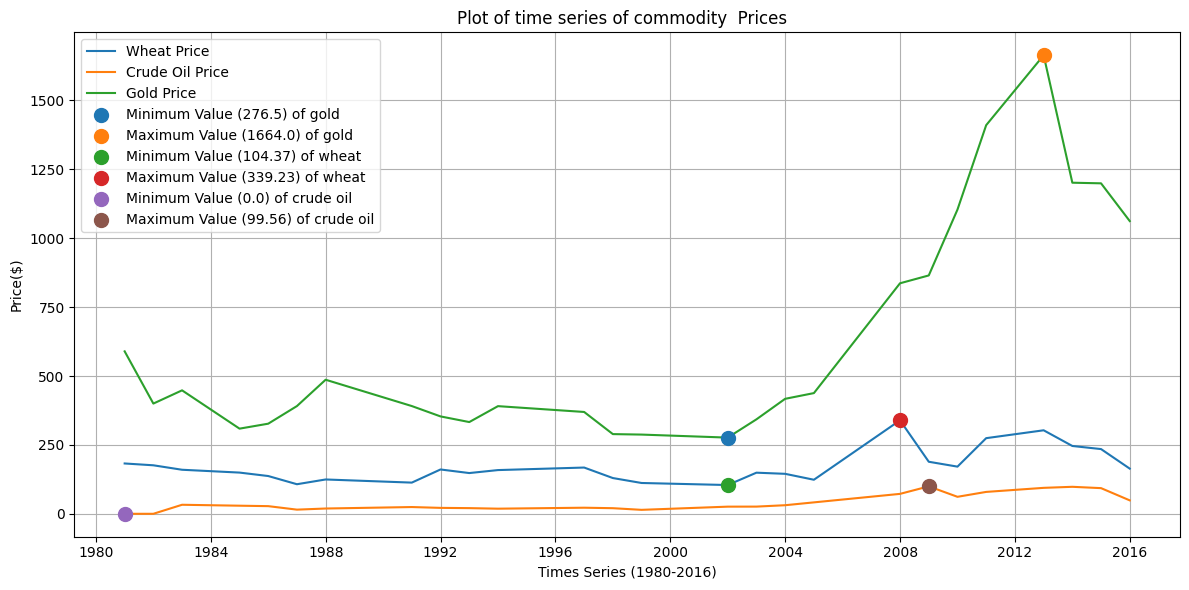

In [89]:

# Set Quandl API key 
quandl.ApiConfig.api_key = 'bghfK__Mrh5Vx2V22k5A'

# Download data for Wheat, Crude Oil, and Gold using the codes from the slides.
#defining the code for the commodities
wheat='ODA/PWHEAMT_USD'
oil='WGEC/WLD_CRUDE_WTI'
gold='BUNDESBANK/BBK01_WT5511'

wheat_data = quandl.get(wheat)
crude_oil_data = quandl.get(oil)
gold_data = quandl.get(gold)
# Merge Wheat and Crude Oil dataframes
merged_data1 = pd.merge(wheat_data, crude_oil_data, on='Date')

# Then merge Gold dataframe
merged_data2 = pd.merge(merged_data1, gold_data, on='Date', how='inner')

# Drop rows with missing values
merged_data2.dropna(inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Wheat Price, Crude Oil Price, and Gold Price
ax.plot(merged_data2.index, merged_data2['Value_x'], label='Wheat Price')
ax.plot(merged_data2.index, merged_data2['Value_y'], label='Crude Oil Price')
ax.plot(merged_data2.index, merged_data2['Value'], label='Gold Price')
ax.set_xlabel('Times Series (1980-2016)')
ax.set_ylabel('Price($)')
#ax.legend()

# Drop rows with missing values
merged_data2.dropna(inplace=True)

# Find minimum and maximum values after dropping missing values
min_date1 = merged_data2['Value'].idxmin()
min_value1 = merged_data2['Value'].min()
max_date1 = merged_data2['Value'].idxmax()
max_value1 = merged_data2['Value'].max()
min_date2 = merged_data2['Value_x'].idxmin()
min_value2 = merged_data2['Value_x'].min()
max_date2 = merged_data2['Value_x'].idxmax()
max_value2 = merged_data2['Value_x'].max()
min_date3 = merged_data2['Value_y'].idxmin()
min_value3 = merged_data2['Value_y'].min()
max_date3 = merged_data2['Value_y'].idxmax()
max_value3 = merged_data2['Value_y'].max()

# Plot minimum and maximum values as colored dots
ax.scatter(min_date1, min_value1, label=f'Minimum Value ({round(min_value1, 2)}) of gold', s=100, zorder=5)
ax.scatter(max_date1, max_value1, label=f'Maximum Value ({max_value1}) of gold', s=100, zorder=5)
ax.scatter(min_date2, min_value2, label=f'Minimum Value ({round(min_value2,2)}) of wheat', s=100, zorder=5)
ax.scatter(max_date2, max_value2, label=f'Maximum Value ({round(max_value2,2)}) of wheat', s=100, zorder=5)
ax.scatter(min_date3, min_value3, label=f'Minimum Value ({min_value3}) of crude oil', s=100, zorder=5)
ax.scatter(max_date3, max_value3, label=f'Maximum Value ({round(max_value3,2)}) of crude oil', s=100, zorder=5)

# Customize the plot (add labels, legend, etc.)
plt.title('Plot of time series of commodity  Prices  ')
plt.grid(True)
plt.tight_layout()
ax.legend()
plt.show()

QUESTION 3

In [90]:

# Loading datasets
carbon2_emissions = pd.read_csv("data/emissions.csv", skiprows=4)
school_enrollment = pd.read_csv("data/enrollment.csv", skiprows=4)

# Filter data for the year 2010
CO2_data_2010 = carbon2_emissions['2010']
enrollment_data = school_enrollment['2010']

# Check for missing data
missing_emissions = CO2_data_2010.isna().sum()
missing_enrollment = enrollment_data.isna().sum()
# Handle missing data by dropping missing rows
CO2_data_2010.dropna(inplace=True)
enrollment_data.dropna(inplace=True)

# Calculate summary statistics for Carbon 2 emissions
mean_CO2 = CO2_data_2010.mean()
median_CO2  = CO2_data_2010.median()
standard_deviation_CO2  = CO2_data_2010.std()

percentiles = np.percentile(CO2_data_2010, [5, 25, 75, 95])

# Create a summary table for Carbon 2 emissions
emissions_statistics = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Std Deviation", "5th Percentile", "25th Percentile", "75th Percentile", "95th Percentile"],
    "Value": [mean_CO2 , median_CO2 , standard_deviation_CO2 , percentiles[0], percentiles[1], percentiles[2], percentiles[3]]
})
col_names=["Statistic","values"]
print("Summary Statistics and it's corresponding values for Carbon 2 Emissions:")
print(tabulate(emissions_statistics,headers=col_names, tablefmt="fancy_grid"))

# Calculate summary statistics for primary school enrollment
mean_enrol= enrollment_data.mean()
median_enrol = enrollment_data.median()
standard_deviation_enrol = enrollment_data.std()

percentiles = np.percentile(enrollment_data, [5, 25, 75, 95])

# Create a summary table for primary school enrollment
enrollment_statistics = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Std Deviation", "5th Percentile", "25th Percentile", "75th Percentile", "95th Percentile"],
    "Value": [mean_enrol, median_enrol, standard_deviation_enrol, percentiles[0], percentiles[1], percentiles[2], percentiles[3]]
})

#printing the statistics table
print("\nSummary Statistics and it's corresponding values for  School Enrollment:")
print(tabulate(enrollment_statistics ,headers=col_names, tablefmt="fancy_grid"))


Summary Statistics and it's corresponding values for Carbon 2 Emissions:
╒════╤═════════════════╤═══════════╕
│    │ Statistic       │    values │
╞════╪═════════════════╪═══════════╡
│  0 │ Mean            │  4.30466  │
├────┼─────────────────┼───────────┤
│  1 │ Median          │  2.66714  │
├────┼─────────────────┼───────────┤
│  2 │ Std Deviation   │  5.06919  │
├────┼─────────────────┼───────────┤
│  3 │ 5th Percentile  │  0.11486  │
├────┼─────────────────┼───────────┤
│  4 │ 25th Percentile │  0.756011 │
├────┼─────────────────┼───────────┤
│  5 │ 75th Percentile │  5.8918   │
├────┼─────────────────┼───────────┤
│  6 │ 95th Percentile │ 15.172    │
╘════╧═════════════════╧═══════════╛

Summary Statistics and it's corresponding values for  School Enrollment:
╒════╤═════════════════╤══════════╕
│    │ Statistic       │   values │
╞════╪═════════════════╪══════════╡
│  0 │ Mean            │ 90.1051  │
├────┼─────────────────┼──────────┤
│  1 │ Median          │ 92.9567  │
├────┼──

QUESTION 4

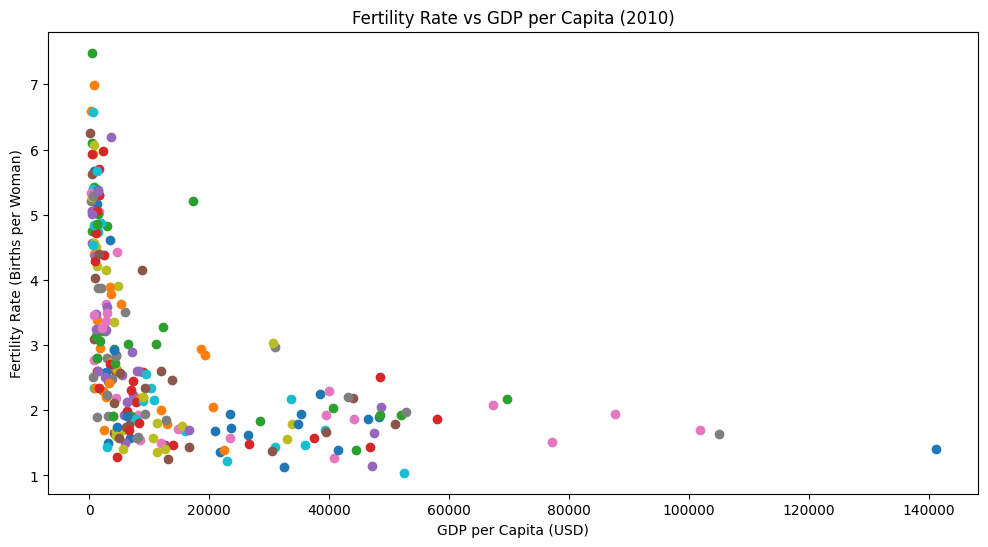

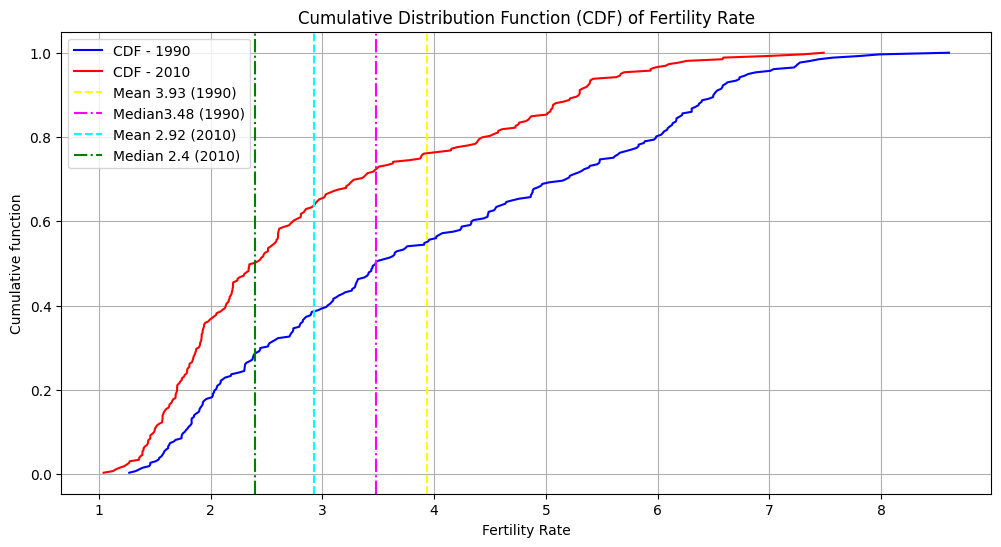

In [91]:
#loading the dataset
Fertility_rate=pd.read_csv("data/Fertility_rate.csv",skiprows=4)
GDP_per_capita=pd.read_csv("data/GDP.csv",skiprows=4)

# Filter the data for the year 2010
fertility_2010 = Fertility_rate[['Country Name', '2010']].dropna()
gdp_per_capita_2010 = GDP_per_capita[['Country Name', '2010']].dropna()

# Merge the dataframes on 'Country Name'
merged_df = pd.merge(fertility_2010, gdp_per_capita_2010, on='Country Name', how='inner')

# Rename columns for clarity
merged_df.columns = ['Country Name', 'Fertility Rate', 'GDP per Capita (USD)']

plt.figure(figsize=(12, 6))
# Iterate over data to plot and label each point
for i, row in merged_df.iterrows():
    plt.scatter(row['GDP per Capita (USD)'], row['Fertility Rate'],  label=row['Country Name'])

plt.title('Fertility Rate vs GDP per Capita (2010)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Fertility Rate (Births per Woman)')
#plt.grid(True)

# Show the plot
plt.show()

# Filter the data for the years 1990 and 2010 and drop missing data values
fertility_1990 = Fertility_rate[['Country Name', '1990']].dropna()
fertility_2010 = Fertility_rate[['Country Name', '2010']].dropna()

# Rename columns for clarity
fertility_1990.columns = ['Country Name', 'Fertility Rate (1990)']
fertility_2010.columns = ['Country Name', 'Fertility Rate (2010)']

# Calculate CDFs
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

#calculating the cdf using sorted data for specified years
sorted_fertility_1990, cdf_1990 = compute_cdf(fertility_1990['Fertility Rate (1990)'])
sorted_fertility_2010, cdf_2010 = compute_cdf(fertility_2010['Fertility Rate (2010)'])

#print(cdf_1990)
# Calculate mean and median of sorted data
mean_1990 = np.mean(sorted_fertility_1990)
median_1990 = np.median(sorted_fertility_1990)
mean_2010 = np.mean(sorted_fertility_2010)
median_2010 = np.median(sorted_fertility_2010)

# Create CDF plots against fertility rate
plt.figure(figsize=(12, 6))
plt.plot(sorted_fertility_1990, cdf_1990, label='CDF - 1990',  color='blue')
plt.plot(sorted_fertility_2010, cdf_2010, label='CDF - 2010',  color='red')

# Add vertical lines for mean and median with legend labels
plt.axvline(mean_1990, color='yellow', linestyle='--', label=f'Mean {round(mean_1990,2)} (1990)')
plt.axvline(median_1990, color='magenta', linestyle='-.', label=f'Median{round(median_1990,2)} (1990)')
plt.axvline(mean_2010, color='cyan', linestyle='--', label= f'Mean {round(mean_2010,2)} (2010)')
plt.axvline(median_2010, color='green', linestyle='-.', label=f'Median {round(median_2010,2)} (2010)')

#customising the data
plt.title('Cumulative Distribution Function (CDF) of Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Cumulative function')
plt.legend()

#display plot
plt.grid(True)
plt.show()


QUESTION 5

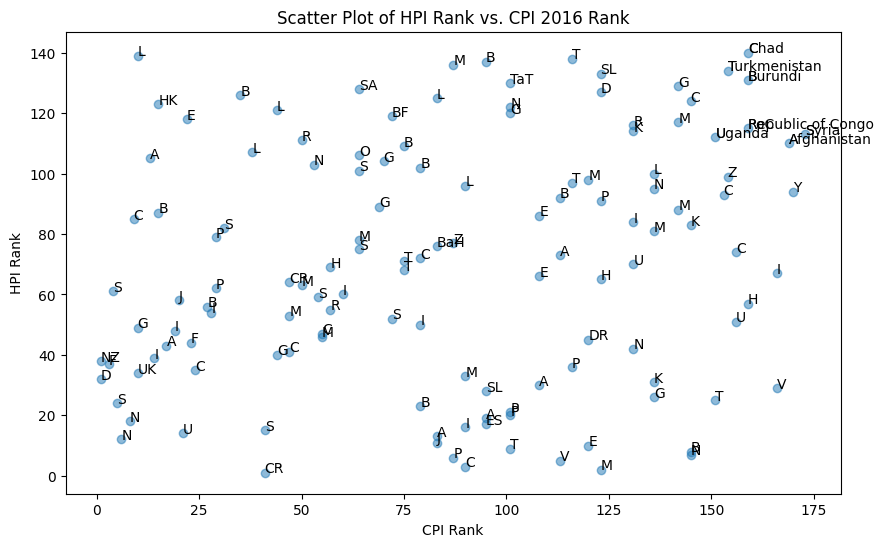

In [92]:
# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
Happy_planet_index=pd.read_excel("data/hpi-data-2016.xlsx", skiprows=5, sheet_name='Complete HPI data', usecols=lambda x: 'Unnamed' not in x)
Corruption_perception_form=pd.read_excel("data/CPI2016_Results.xlsx", sheet_name='CPI 2015-2016', usecols=lambda x: 'Unnamed' not in x)
# Merge the two DataFrames on the 'Country' column
merged_data = pd.merge(Happy_planet_index[['Country', 'HPI Rank']], Corruption_perception_form[['Country', 'CPI 2016 Rank']], on='Country')
# Filter out rows with missing ranks
merged_data.dropna(subset=['HPI Rank', 'CPI 2016 Rank'], inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['CPI 2016 Rank'],merged_data['HPI Rank'], alpha=0.5)
plt.title('Scatter Plot of HPI Rank vs. CPI 2016 Rank')
plt.xlabel('CPI Rank')
plt.ylabel('HPI Rank')

# Annotate some unusual countries
unusual_countries = merged_data[(merged_data['HPI Rank'] > 100) & (merged_data['CPI 2016 Rank'] > 150)]
for i, row in unusual_countries.iterrows():
    plt.annotate(row['Country'], (row['CPI 2016 Rank'],row['HPI Rank']))
    
# Annotate points with country abbreviations
for i, row in merged_data.iterrows():
    country_name = row['Country']
    abbreviation = ''.join(word[0] for word in country_name.split())
    plt.annotate(abbreviation, (row['CPI 2016 Rank'],row['HPI Rank']))
#plt.grid(True)
plt.show()